## **<font color='Purple'> En este proyecto, se realizará el análisis del forecast del área de planificación y compras.</font>**


📌 Objetivo del Código

Se realizará un forecasting (pronóstico) de demanda en el área de compras y planificación utilizando ARIMA, un modelo estadístico para series de tiempo.

El flujo de trabajo será:
1️⃣ Cargar los datos y preprocesarlos.

2️⃣ Visualizar la serie de tiempo.

3️⃣ Aplicar ARIMA para generar el pronóstico.

4️⃣ Visualizar los resultados.

5️⃣ Exportar los datos para usarlos en Power BI.

# **<font color='Purple'>🔹Explicación de los Conceptos Clave</font>**


1️⃣ Series de Tiempo: Datos ordenados cronológicamente, usados para analizar tendencias pasadas y futuras.

2️⃣ ARIMA (p,d,q): Modelo de predicción donde:

    p: Autoregresión (cuántos valores pasados usamos).
    d: Diferenciación (para estabilizar la serie).
    q: Media móvil (cómo usamos los errores pasados).
    
    3️⃣ Forecasting: Proceso de predecir valores futuros basados en patrones históricos.
    
    4️⃣ Visualización: Gráficos para entender mejor la evolución de los datos.
    
    5️⃣ Exportación a CSV: Guardar el pronóstico para integrarlo con Power BI.

In [1]:
# 🛠️ PASO 1: Importar las librerías necesarias
import pandas as pd  # Manipulación de datos
import numpy as np  # Cálculos numéricos
import matplotlib.pyplot as plt  # Gráficos
import seaborn as sns  # Gráficos más bonitos
from statsmodels.tsa.arima.model import ARIMA  # Modelo ARIMA para forecasting

In [2]:
# 📌 PASO 2: Crear o cargar el dataset de demanda (Simulado)
# En la práctica, aquí cargarías un archivo CSV con `pd.read_csv("archivo.csv")`
fechas = pd.date_range(start="2020-01-01", periods=36, freq="ME")  # 36 meses de datos
demanda = np.random.randint(50, 200, size=len(fechas))  # Valores aleatorios de demanda

In [3]:
df = pd.DataFrame({"Fecha": fechas, "Demanda": demanda})  # Crear DataFrame
df.set_index("Fecha", inplace=True)  # Establecer "Fecha" como índice

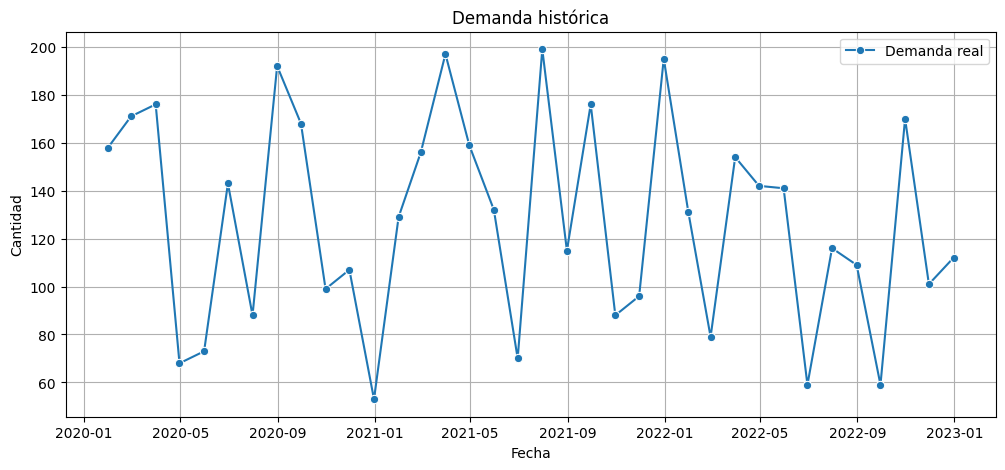

In [4]:
# 📊 PASO 3: Visualizar la serie de tiempo
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x=df.index, y="Demanda", marker="o", label="Demanda real")
plt.title("Demanda histórica")
plt.xlabel("Fecha")
plt.ylabel("Cantidad")
plt.grid(True)
plt.legend()
plt.show()

In [11]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# 🔄 PASO 4: Asegurar que la columna 'Fecha' sea el índice y tenga una frecuencia definida
df.index = pd.to_datetime(df.index)  # Convertimos el índice en tipo datetime
df = df.asfreq("ME")  # Definir la frecuencia como mensual

# 📌 Asegurar que la columna "Demanda" sea numérica
df["Demanda"] = pd.to_numeric(df["Demanda"], errors="coerce")

In [10]:
# 🔄 PASO 5: Definir y entrenar el modelo ARIMA
modelo = ARIMA(df["Demanda"], order=(2, 1, 2))  # ARIMA(p=2, d=1, q=2)
modelo_entrenado = modelo.fit()  # Entrenar el modelo


C:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [12]:
# 📌 Mostrar resumen del modelo
print(modelo_entrenado.summary())

                               SARIMAX Results                                
Dep. Variable:                Demanda   No. Observations:                   36
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -183.535
Date:                Tue, 18 Mar 2025   AIC                            377.069
Time:                        22:12:52   BIC                            384.846
Sample:                    01-31-2020   HQIC                           379.754
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6503      1.577     -0.412      0.680      -3.741       2.441
ar.L2         -0.0810      0.217     -0.373      0.709      -0.507       0.345
ma.L1         -0.3839     55.350     -0.007      0.9

In [13]:
# 🔮 Generar pronóstico para los próximos 3 meses
fechas_futuras = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=3, freq="ME")
prediccion = modelo_entrenado.forecast(steps=3)


In [14]:
# 📌 Crear DataFrame con la predicción
df_prediccion = pd.DataFrame({"Fecha": fechas_futuras, "Demanda_Pronosticada": prediccion.values})
df_prediccion.set_index("Fecha", inplace=True)

C:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


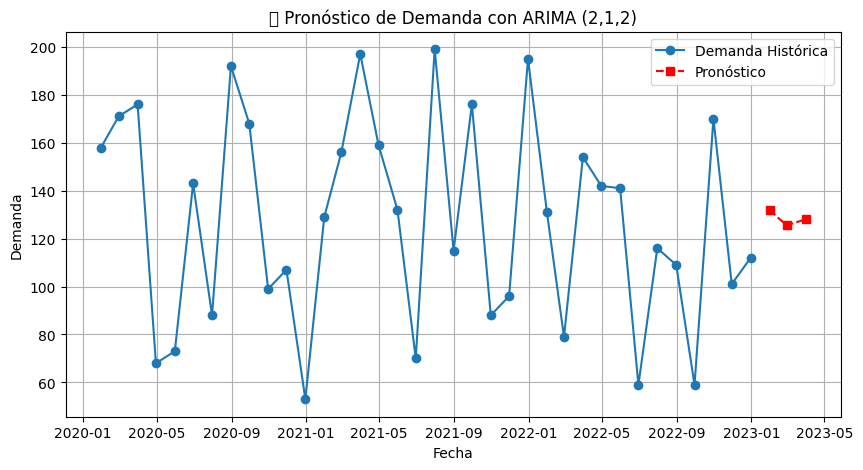

In [15]:
# 📊 Visualizar los resultados
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Demanda"], label="Demanda Histórica", marker="o")
plt.plot(df_prediccion.index, df_prediccion["Demanda_Pronosticada"], label="Pronóstico", linestyle="dashed", marker="s", color="red")
plt.xlabel("Fecha")
plt.ylabel("Demanda")
plt.title("📈 Pronóstico de Demanda con ARIMA (2,1,2)")
plt.legend()
plt.grid()
plt.show()

In [16]:
# 📌 Mostrar predicción
print("🔮 Pronóstico de demanda para los próximos 3 meses:")
print(df_prediccion)

🔮 Pronóstico de demanda para los próximos 3 meses:
            Demanda_Pronosticada
Fecha                           
2023-01-31            131.896184
2023-02-28            125.499142
2023-03-31            128.048030


In [18]:
# 💾 PASO 8: Exportar los datos a CSV para Power BI
df_prediccion.to_csv("pronostico_demanda.csv")
print("✅ Pronóstico guardado como 'pronostico_demanda.csv'. Listo para Power BI!")

✅ Pronóstico guardado como 'pronostico_demanda.csv'. Listo para Power BI!
